# US CENSUS DATA ANALYSIS - DEC 2017

In [68]:
!pip install pyspark

In [12]:
# import os
# os.environ['SPARK_HOME'] = '~/Apache/spark'

In [13]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder \
    .appName("CensusDataAnalysis") \
    .getOrCreate()

# Load Data and Import neccesary libraries

In [14]:
file_path = "~/Census Data/dec17pub.dat"

In [70]:
from pyspark.sql.functions import *
from pyspark.sql import functions as F

In [16]:

# Define the column schema based on the provided instructions
schema = (
    "line string"  
)

# Read the file with the specified schema and options
df = spark.read.schema(schema).option("header", "false").text(file_path)

In [17]:


# Extracting columns using substring functions
df = df.select(
    substring("line", 1, 15).alias("HRHHID"),
    substring("line", 16, 2).alias("HRMONTH"),
    substring("line", 18, 4).alias("HRYEAR4"),
    substring("line", 22, 2).alias("HURESPLI"),
    substring("line", 24, 3).alias("HUFINAL"),
    substring("line", 27, 2).alias("FILLER"),
    substring("line", 29, 2).alias("HETENURE"),
    substring("line", 31, 2).alias("HEHOUSUT"),
    substring("line", 33, 2).alias("HETELHHD"),
    substring("line", 35, 2).alias("HETELAVL"),
    substring("line", 37, 2).alias("HEPHONEO"),
    substring("line", 39, 2).alias("HEFAMINC"),
    substring("line", 41, 2).alias("HUTYPEA"),
    substring("line", 43, 2).alias("HUTYPB"),
    substring("line", 45, 2).alias("HUTYPC"),
    substring("line", 47, 10).alias("HWHHWGT"),
    substring("line", 57, 2).alias("HRINTSTA"),
    substring("line", 59, 2).alias("HRNUMHOU"),
    substring("line", 61, 2).alias("HRHTYPE"),
    substring("line", 63, 2).alias("HRMIS"),
    substring("line", 65, 2).alias("HUINTTYP"),
    substring("line", 67, 2).alias("HUPRSCNT"),
    substring("line", 69, 2).alias("HRLONGLK"),
    substring("line", 71, 5).alias("HRHHID2"),
    substring("line", 76, 2).alias("HWHHWTLN"),
    substring("line", 78, 1).alias("column26"),
    substring("line", 79, 2).alias("HUBUS"),
    substring("line", 81, 2).alias("HUBUSL1"),
    substring("line", 83, 2).alias("HUBUSL2"),
    substring("line", 85, 2).alias("HUBUSL3"),
    substring("line", 87, 2).alias("HUBUSL4"),
    substring("line", 89, 2).alias("GEREG"),
    substring("line", 91, 1).alias("GEDIV"),
    substring("line", 92, 1).alias("column34"),
    substring("line", 93, 2).alias("GESTFIPS"),
    substring("line", 95, 1).alias("column36"),
    substring("line", 96, 5).alias("GTCBSA"),
    substring("line", 101, 3).alias("GTCO"),
    substring("line", 104, 1).alias("GTCBSAST"),
    substring("line", 105, 1).alias("GTMETSTA"),
    substring("line", 106, 1).alias("GTINDVPC"),
    substring("line", 107, 1).alias("GTCBSASZ"),
    substring("line", 108, 3).alias("GTCSA"),
    substring("line", 111, 3).alias("PERRP"),
    substring("line", 114, 2).alias("column45"),
    substring("line", 118, 2).alias("column46"),
    substring("line", 120, 2).alias("PEPARENT"),
    substring("line", 122, 2).alias("PRTAGE"),
    substring("line", 124, 1).alias("PRTFAGE"),
    substring("line", 125, 2).alias("PEMARITL"),
    substring("line", 127, 2).alias("PESPOUSE"),
    substring("line", 129, 2).alias("PESEX"),
    substring("line", 131, 2).alias("PEAFEVER"),
    substring("line", 133, 2).alias("column54"),
    substring("line", 135, 2).alias("PEAFNOW"),
    substring("line", 137, 2).alias("PEEDUCA"),
    substring("line", 139, 2).alias("PTDTRACE"),
    substring("line", 141, 2).alias("PRDTHSP"),
    substring("line", 143, 2).alias("PUCHINHH"),
    substring("line", 145, 2).alias("column60"),
    substring("line", 147, 2).alias("PULINENO"),
    substring("line", 149, 2).alias("column62")
    
)

In [18]:
#Show the DataFrame to get a glimpse of the dataframe
df.show(truncate=False)

+---------------+-------+-------+--------+-------+------+--------+--------+--------+--------+--------+--------+-------+------+------+----------+--------+--------+-------+-----+--------+--------+--------+-------+--------+--------+-----+-------+-------+-------+-------+-----+-----+--------+--------+--------+------+----+--------+--------+--------+--------+-----+-----+--------+--------+--------+------+-------+--------+--------+-----+--------+--------+-------+-------+--------+-------+--------+--------+--------+--------+
|HRHHID         |HRMONTH|HRYEAR4|HURESPLI|HUFINAL|FILLER|HETENURE|HEHOUSUT|HETELHHD|HETELAVL|HEPHONEO|HEFAMINC|HUTYPEA|HUTYPB|HUTYPC|HWHHWGT   |HRINTSTA|HRNUMHOU|HRHTYPE|HRMIS|HUINTTYP|HUPRSCNT|HRLONGLK|HRHHID2|HWHHWTLN|column26|HUBUS|HUBUSL1|HUBUSL2|HUBUSL3|HUBUSL4|GEREG|GEDIV|column34|GESTFIPS|column36|GTCBSA|GTCO|GTCBSAST|GTMETSTA|GTINDVPC|GTCBSASZ|GTCSA|PERRP|column45|column46|PEPARENT|PRTAGE|PRTFAGE|PEMARITL|PESPOUSE|PESEX|PEAFEVER|column54|PEAFNOW|PEEDUCA|PTDTRACE|PRDTH

In [19]:
df.printSchema()

root
 |-- HRHHID: string (nullable = true)
 |-- HRMONTH: string (nullable = true)
 |-- HRYEAR4: string (nullable = true)
 |-- HURESPLI: string (nullable = true)
 |-- HUFINAL: string (nullable = true)
 |-- FILLER: string (nullable = true)
 |-- HETENURE: string (nullable = true)
 |-- HEHOUSUT: string (nullable = true)
 |-- HETELHHD: string (nullable = true)
 |-- HETELAVL: string (nullable = true)
 |-- HEPHONEO: string (nullable = true)
 |-- HEFAMINC: string (nullable = true)
 |-- HUTYPEA: string (nullable = true)
 |-- HUTYPB: string (nullable = true)
 |-- HUTYPC: string (nullable = true)
 |-- HWHHWGT: string (nullable = true)
 |-- HRINTSTA: string (nullable = true)
 |-- HRNUMHOU: string (nullable = true)
 |-- HRHTYPE: string (nullable = true)
 |-- HRMIS: string (nullable = true)
 |-- HUINTTYP: string (nullable = true)
 |-- HUPRSCNT: string (nullable = true)
 |-- HRLONGLK: string (nullable = true)
 |-- HRHHID2: string (nullable = true)
 |-- HWHHWTLN: string (nullable = true)
 |-- column26

In [20]:
# Defining a list of column names which are the columns I will be working with
selected_columns = [
    "HRHHID",
    "HRMONTH",
    "HRYEAR4",
    "HUFINAL",
    "HEHOUSUT",
    "HRHTYPE",
    "HETELHHD",
    "HETELAVL",
    "HEPHONEO",
    "HUINTTYP",
    "HEFAMINC",
    "GEDIV",
    "PTDTRACE"
]

# Select the specified columns to create a new DataFrame
new_df = df.select(selected_columns)

In [21]:
new_df.show() #to catch a glimpse of my new dataframe with the important columns for my analysis

+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|         HRHHID|HRMONTH|HRYEAR4|HUFINAL|HEHOUSUT|HRHTYPE|HETELHHD|HETELAVL|HEPHONEO|HUINTTYP|HEFAMINC|GEDIV|PTDTRACE|
+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|000004795110719|     12|   2017|    201|       1|      1|       1|      -1|       1|       2|       9|    6|       1|
|000004795110719|     12|   2017|    201|       1|      1|       1|      -1|       1|       2|       9|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|      -1|       1|       1|      11|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|      -1|       1|       1|      11|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|      -1|       1|       1|      11|    6|       1|
|000110177987986|     12|   2017|    201|       

In [32]:

# Filter the DataFrame to select rows where 'HETELHHD' is '-1', '-3', or '-2'
filtered_df1 = new_df.filter((new_df['HETELAVL'] == '-3') | (new_df['HETELHHD'] == '-2'))

# Show the selected rows
filtered_df1.show(17800)

+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|         HRHHID|HRMONTH|HRYEAR4|HUFINAL|HEHOUSUT|HRHTYPE|HETELHHD|HETELAVL|HEPHONEO|HUINTTYP|HEFAMINC|GEDIV|PTDTRACE|
+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|000360812011108|     12|   2017|    201|       1|      1|       1|      -3|       0|       1|      15|    6|       1|
|000360812011108|     12|   2017|    201|       1|      1|       1|      -3|       0|       1|      15|    6|       1|
|210601180308100|     12|   2017|    201|       1|      6|       1|      -3|       0|       1|      14|    6|       1|
|000110274579133|     12|   2017|    201|       1|      6|       1|      -3|       0|       1|      12|    6|       1|
|000110435649045|     12|   2017|    201|       1|      1|       1|      -3|       0|       1|      15|    6|       2|
|000110435649045|     12|   2017|    201|       

# ASSUMPTIONS

The following assumptions were made for the analysis of the data.

- I assumed that values such as '-1' and '-2' represent the values '1' and '2' respectively. from the data dictionary, this represents "YES" and "NO" respectively. 
- I assumed values of '-3' were either incorrect or missing. Hence I replaced them with 'NA'.
- Responses with values of "0" in "HEPHONEO" were replaced with " 2". I assumed that since '1' already represents 'YES', then '0' should represent 'NO' which has a value of '2' in the data dictionary

# TRANSFORMING AND PROCESSING THE DATA

In [36]:

# Define a User-Defined Function (UDF) to replace values
def replace_values(value):
    if value == "-1":
        return " 1"
    elif value == "-2":
        return " 2"
    elif value == "-3":
        return "NA" 
    else:
        return value

# Register the UDF
replace_values_udf = udf(replace_values, StringType())

# Apply the UDF to the columns
columns_to_transform = ["HETELHHD", "HETELAVL", "PTDTRACE", "HUINTTYP", "HEFAMINC"]
for column in columns_to_transform:
    new_df = new_df.withColumn(column, replace_values_udf(new_df[column]))

# Show the transformed DataFrame
new_df.show()

+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|         HRHHID|HRMONTH|HRYEAR4|HUFINAL|HEHOUSUT|HRHTYPE|HETELHHD|HETELAVL|HEPHONEO|HUINTTYP|HEFAMINC|GEDIV|PTDTRACE|
+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|000004795110719|     12|   2017|    201|       1|      1|       1|       1|       1|       2|       9|    6|       1|
|000004795110719|     12|   2017|    201|       1|      1|       1|       1|       1|       2|       9|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|       1|       1|       1|      11|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|       1|       1|       1|      11|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|       1|       1|       1|      11|    6|       1|
|000110177987986|     12|   2017|    201|       

In [44]:

# Replace "0" with "2" in column HEPHONEO
new_df = new_df.withColumn("HEPHONEO", when(col("HEPHONEO") == " 0", " 2").otherwise(col("HEPHONEO")))

# Show the updated DataFrame
new_df.show()

+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|         HRHHID|HRMONTH|HRYEAR4|HUFINAL|HEHOUSUT|HRHTYPE|HETELHHD|HETELAVL|HEPHONEO|HUINTTYP|HEFAMINC|GEDIV|PTDTRACE|
+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+
|000004795110719|     12|   2017|    201|       1|      1|       1|       1|       1|       2|       9|    6|       1|
|000004795110719|     12|   2017|    201|       1|      1|       1|       1|       1|       2|       9|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|       1|       1|       1|      11|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|       1|       1|       1|      11|    6|       1|
|000071691004941|     12|   2017|    201|       1|      1|       1|       1|       1|       1|      11|    6|       1|
|000110177987986|     12|   2017|    201|       

In [45]:
# Get unique values in each column
unique_values = {col: new_df.select(col).distinct().rdd.flatMap(lambda x: x).collect() for col in new_df.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in column '{col}': {values}")

Unique values in column 'HRHHID': ['000110119697987', '007260614044140', '401000254110733', '000212304908505', '620461100105420', '019750018070211', '107092554006511', '310404370371064', '176084431007821', '629034546002941', '701843019100556', '740341100602306', '000510338845614', '002003199510531', '955412701810002', '910003300259075', '150757140404202', '911454009300607', '000612085954529', '127056234022621', '127056534013621', '160603170103614', '160834160502607', '404002596610782', '510100700039656', '623880198921200', '656246921621003', '828031704610402', '000270214047665', '018190213092650', '129980060088240', '166036537000701', '227016718002411', '301056165006631', '359026812005231', '809010521110069', '810721150607401', '191740882701000', '281710004200257', '805005567110820', '007400318016184', '391336201950003', '541615008500996', '029190710043220', '221125027300975', '142911311132007', '261527022201651', '882248711491005', '111014526006001', '214298201760003', '47799064234140

In [46]:


# Define mapping dictionaries for each column. This was obtained from the data dictionary
mapping_HUFINAL = {
    "  1": "FULLY COMPLETE CATI INTERVIEW",
    "  2": "PARTIALLY COMPLETED CATI INTERVIEW",
    "  3": "COMPLETE BUT PERSONAL VISIT REQUESTED NEXT MONTH",
    "  4": "PARTIAL, NOT COMPLETE AT CLOSEOUT",
    "  5": "LABOR FORCE COMPLETE, SUPPLEMENT INCOMPLETE - CATI",
    "  6": "LF COMPLETE, SUPPLEMENT DK ITEMS INCOMPLETE AT CLOSEOUT–ASEC ONLY",
    " 20": "HH OCCUPIED ENTIRELY BY ARMED FORCES MEMBERS OR ALL UNDER 15 YEARS OF AGE",
    "201": "CAPI COMPLETE",
    "202": "CALLBACK NEEDED",
    "203": "SUFFICIENT PARTIAL - PRECLOSEOUT",
    "204": "SUFFICIENT PARTIAL - AT CLOSEOUT",
    "205": "LABOR FORCE COMPLETE, - SUPPL. INCOMPLETE - CAPI",
    "213": "LANGUAGE BARRIER",
    "214": "UNABLE TO LOCATE",
    "216": "NO ONE HOME",
    "217": "TEMPORARILY ABSENT",
    "218": "REFUSED",
    "219": "OTHER OCCUPIED - SPECIFY",
    "223": "ENTIRE HOUSEHOLD ARMED FORCES",
    "224": "ENTIRE HOUSEHOLD UNDER 15",
    "225": "TEMP. OCCUPIED W/PERSONS WITH URE",
    "226": "VACANT REGULAR",
    "227": "VACANT - STORAGE OF HHLD FURNITURE",
    "228": "UNFIT, TO BE DEMOLISHED",
    "229": "UNDER CONSTRUCTION, NOT READY",
    "230": "CONVERTED TO TEMP BUSINESS OR STORAGE",
    "231": "UNOCCUPIED TENT OR TRAILER SITE",
    "232": "PERMIT GRANTED - CONSTRUCTION NOT STARTED",
    "233": "OTHER - SPECIFY",
    "240": "DEMOLISHED",
    "241": "HOUSE OR TRAILER MOVED",
    "242": "OUTSIDE SEGMENT",
    "243": "CONVERTED TO PERM. BUSINESS OR STORAGE",
    "244": "MERGED",
    "245": "CONDEMNED",
    "246": "BUILT AFTER APRIL 1, 2000",
    "247": "UNUSED SERIAL NO./LISTING SHEET LINE",
    "248": "OTHER - SPECIFY",
    "256": "REMOVED DURING SUB-SAMPLING",
    "257": "UNIT ALREADY HAD A CHANCE OF SELECTION"
}

mapping_HEHOUSUT = {
    " 0": "OTHER UNIT",
    " 1": "HOUSE, APARTMENT, FLAT",
    " 2": "HU IN NONTRANSIENT HOTEL, MOTEL, ETC.",
    " 3": "HU PERMANENT IN TRANSIENT HOTEL, MOTEL",
    " 4": "HU IN ROOMING HOUSE",
    " 5": "MOBILE HOME OR TRAILER W/NO PERM. ROOM ADDED",
    " 6": "MOBILE HOME OR TRAILER W/1 OR MORE PERM. ROOMS ADDED",
    " 7": "HU NOT SPECIFIED ABOVE",
    " 8": "QUARTERS NOT HU IN ROOMING OR BRDING HS",
    " 9": "UNIT NOT PERM. IN TRANSIENT HOTL, MOTL",
    "10": "UNOCCUPIED TENT SITE OR TRLR SITE",
    "11": "STUDENT QUARTERS IN COLLEGE DORM",
    "12": "OTHER UNIT NOT SPECIFIED ABOVE",
}

mapping_HRHTYPE = {
    " 0": "NON-INTERVIEW HOUSEHOLD",
    " 1": "HUSBAND/WIFE PRIMARY FAMILY (NEITHER AF)",
    " 2": "HUSB/WIFE PRIM. FAMILY (EITHER/BOTH AF)",
    " 3": "UNMARRIED CIVILIAN MALE-PRIM. FAM HHLDER", 
    " 4": "UNMARRIED CIV. FEMALE-PRIM FAM HHLDER",
    " 5": "PRIMARY FAMILY HHLDER-RP IN AF, UNMAR.",
    " 6": "CIVILIAN MALE PRIMARY INDIVIDUAL",
    " 7": "CIVILIAN FEMALE PRIMARY INDIVIDUAL",
    " 8": "PRIMARY INDIVIDUAL HHLD-RP IN AF",
    " 9": "GROUP QUARTERS WITH FAMILY",
    "10": "GROUP QUARTERS WITHOUT FAMILY"
}

mapping_HETELHHD = {
    " 1": "YES",
    " 2": "NO"
}

mapping_HETELAVL = {
    " 1": "YES",
    " 2": "NO"
}

mapping_HEPHONEO = {
    " 1": "YES",
    " 2": "NO"
}

mapping_HUINTTYP = {
    " 0": "NONINTERVIEW/INDETERMINATE",              
    " 1": "PERSONAL", 
    " 2": "TELEPHONE"
}

mapping_HEFAMINC = {
    " 1": "LESS THAN $5,000",
    " 2": "5,000 TO 7,499",
    " 3": "7,500 TO 9,999",
    " 4": "10,000 TO 12,499",
    " 5": "12,500 TO 14,999",
    " 6": "15,000 TO 19,999",
    " 7": "20,000 TO 24,999",
    " 8": "25,000 TO 29,999",
    " 9": "30,000 TO 34,999",
    "10": "35,000 TO 39,999",
    "11": "40,000 TO 49,999",
    "12": "50,000 TO 59,999",
    "13": "60,000 TO 74,999",
    "14": "75,000 TO 99,999",
    "15": "100,000 TO 149,999",
    "16": "150,000 OR MORE"
}

mapping_GEDIV = {
    "1": "NEW ENGLAND",
    "2": "MIDDLE ATLANTIC",
    "3": "EAST NORTH CENTRAL",
    "4": "WEST NORTH CENTRAL",
    "5": "SOUTH ATLANTIC",
    "6": "EAST SOUTH CENTRAL",
    "7": "WEST SOUTH CENTRAL",
    "8": "MOUNTAIN",
    "9": "PACIFIC"
}

mapping_PTDTRACE = {
    " 1": "White Only",
    " 2": "Black Only",
    " 3": "American Indian, Alaskan Native Only",
    " 4": "Asian Only",
    " 5": "Hawaiian/Pacific Islander Only",
    " 6": "White-Black",
    " 7": "White-AI",
    " 8": "White-Asian",
    " 9": "White-HP",
    "10": "Black-AI",
    "11": "Black-Asian",
    "12": "Black-HP",
    "13": "AI-Asian",
    "14": "AI-HP",
    "15": "Asian-HP",
    "16": "W-B-AI",
    "17": "W-B-A",
    "18": "W-B-HP",
    "19": "W-AI-A",
    "20": "W-AI-HP",
    "21": "W-A-HP",
    "22": "B-AI-A",
    "23": "W-B-AI-A",
    "24": "W-AI-A-HP",
    "25": "Other 3 Race Combinations",
    "26": "Other 4 and 5 Race Combinations"
}


In [47]:

# Create a list of columns to decode
columns_to_decode = ["HUFINAL", "HEHOUSUT", "HRHTYPE", "HETELHHD", "HETELAVL", "HEPHONEO", "HUINTTYP", "HEFAMINC", "GEDIV", "PTDTRACE"]

# Define a function to decode a column
def decode_column(df, column_name, mapping):
    return new_df.withColumn(
        f"decoded_{column_name}",
        expr(
            f"""
            CASE WHEN {column_name} IS NOT NULL
            THEN map(
                {", ".join(f"'{key}', '{value}'" for key, value in mapping.items())}
            )[{column_name}]
            END
            """
        )
    )

# # Apply the decoding function to each column
# decoded_dfs = {}
for column_name in columns_to_decode:
    if column_name == "HUFINAL":
        new_df = decode_column(new_df, column_name, mapping_HUFINAL)
    elif column_name == "HEHOUSUT":
        new_df = decode_column(new_df, column_name, mapping_HEHOUSUT)
    elif column_name == "HRHTYPE":
        new_df = decode_column(new_df, column_name, mapping_HRHTYPE)
    elif column_name == "HETELHHD":
        new_df = decode_column(new_df, column_name, mapping_HETELHHD)
    elif column_name == "HETELAVL":
        new_df = decode_column(new_df, column_name, mapping_HETELAVL)
    elif column_name == "HEPHONEO":
        new_df = decode_column(new_df, column_name, mapping_HEPHONEO)
    elif column_name == "HUINTTYP":
        new_df = decode_column(new_df, column_name, mapping_HUINTTYP)
    elif column_name == "HEFAMINC":
        new_df = decode_column(new_df, column_name, mapping_HEFAMINC)
    elif column_name == "GEDIV":
        new_df = decode_column(new_df, column_name, mapping_GEDIV)
    elif column_name == "PTDTRACE":
        new_df = decode_column(new_df, column_name, mapping_PTDTRACE)

In [48]:
new_df.show()

+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+----------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+------------------+----------------+
|         HRHHID|HRMONTH|HRYEAR4|HUFINAL|HEHOUSUT|HRHTYPE|HETELHHD|HETELAVL|HEPHONEO|HUINTTYP|HEFAMINC|GEDIV|PTDTRACE| decoded_HUFINAL|    decoded_HEHOUSUT|     decoded_HRHTYPE|decoded_HETELHHD|decoded_HETELAVL|decoded_HEPHONEO|decoded_HUINTTYP|decoded_HEFAMINC|     decoded_GEDIV|decoded_PTDTRACE|
+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+----------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+------------------+----------------+
|000004795110719|     12|   2017|    201|       1|      1|       1|       1|       1|       2|       9|

In [49]:

# Create a new column "date" by concatenating HRYEAR4 and HRMONTH
new_df = new_df.withColumn("date", concat_ws("-", col("HRYEAR4"), col("HRMONTH")))

# Convert the concatenated column to a date
new_df = new_df.withColumn("date", to_date(col("date"), "yyyy-MM"))

# Format the date column to "yyyy/MMM" format
new_df = new_df.withColumn("Time of Interview", date_format(col("date"), "yyyy/MMM"))

# Show the updated DataFrame
new_df.show()


+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+----------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+------------------+----------------+----------+-----------------+
|         HRHHID|HRMONTH|HRYEAR4|HUFINAL|HEHOUSUT|HRHTYPE|HETELHHD|HETELAVL|HEPHONEO|HUINTTYP|HEFAMINC|GEDIV|PTDTRACE| decoded_HUFINAL|    decoded_HEHOUSUT|     decoded_HRHTYPE|decoded_HETELHHD|decoded_HETELAVL|decoded_HEPHONEO|decoded_HUINTTYP|decoded_HEFAMINC|     decoded_GEDIV|decoded_PTDTRACE|      date|Time of Interview|
+---------------+-------+-------+-------+--------+-------+--------+--------+--------+--------+--------+-----+--------+----------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+------------------+----------------+----------+-----------------+
|000004795110719

In [50]:
# Define a list of column names or expressions for the columns you want to select
selected_columns_1 = [
    "HRHHID",
    "Time of Interview",
    "decoded_HUFINAL",
    "decoded_HEHOUSUT",
    "decoded_HRHTYPE",
    "decoded_HETELHHD",
    "decoded_HETELAVL",
    "decoded_HEPHONEO",
    "decoded_HUINTTYP",
    "decoded_HEFAMINC",
    "decoded_GEDIV",
    "decoded_PTDTRACE",
]

# Select the specified columns to create a new DataFrame
transformed_df = new_df.select(selected_columns_1)

In [51]:
transformed_df.show(10)

+---------------+-----------------+----------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+------------------+----------------+
|         HRHHID|Time of Interview| decoded_HUFINAL|    decoded_HEHOUSUT|     decoded_HRHTYPE|decoded_HETELHHD|decoded_HETELAVL|decoded_HEPHONEO|decoded_HUINTTYP|decoded_HEFAMINC|     decoded_GEDIV|decoded_PTDTRACE|
+---------------+-----------------+----------------+--------------------+--------------------+----------------+----------------+----------------+----------------+----------------+------------------+----------------+
|000004795110719|         2017/Dec|   CAPI COMPLETE|HOUSE, APARTMENT,...|HUSBAND/WIFE PRIM...|             YES|             YES|             YES|       TELEPHONE|30,000 TO 34,999|EAST SOUTH CENTRAL|      White Only|
|000004795110719|         2017/Dec|   CAPI COMPLETE|HOUSE, APARTMENT,...|HUSBAND/WIFE PRIM...|             YES|             YES|        

In [53]:
# Group by HEFAMINC and count the responders in each group
result_1 = transformed_df.groupBy("decoded_HEFAMINC").agg(count("*").alias("Responder Count"))

result_1 = result_1.orderBy(col("Responder Count").desc())

# Show the result
result_1.show()


+------------------+---------------+
|  decoded_HEFAMINC|Responder Count|
+------------------+---------------+
|  LESS THAN $5,000|          23527|
|100,000 TO 149,999|          17794|
|  75,000 TO 99,999|          16557|
|   150,000 OR MORE|          15704|
|  60,000 TO 74,999|          13442|
|  50,000 TO 59,999|           9971|
|  40,000 TO 49,999|           9788|
|  30,000 TO 34,999|           6743|
|  35,000 TO 39,999|           6620|
|  20,000 TO 24,999|           6312|
|  25,000 TO 29,999|           5803|
|  15,000 TO 19,999|           4518|
|  10,000 TO 12,499|           3161|
|  12,500 TO 14,999|           2614|
|    7,500 TO 9,999|           2277|
|    5,000 TO 7,499|           1625|
+------------------+---------------+



The answer above is displayed as a bar chart in the figure below.

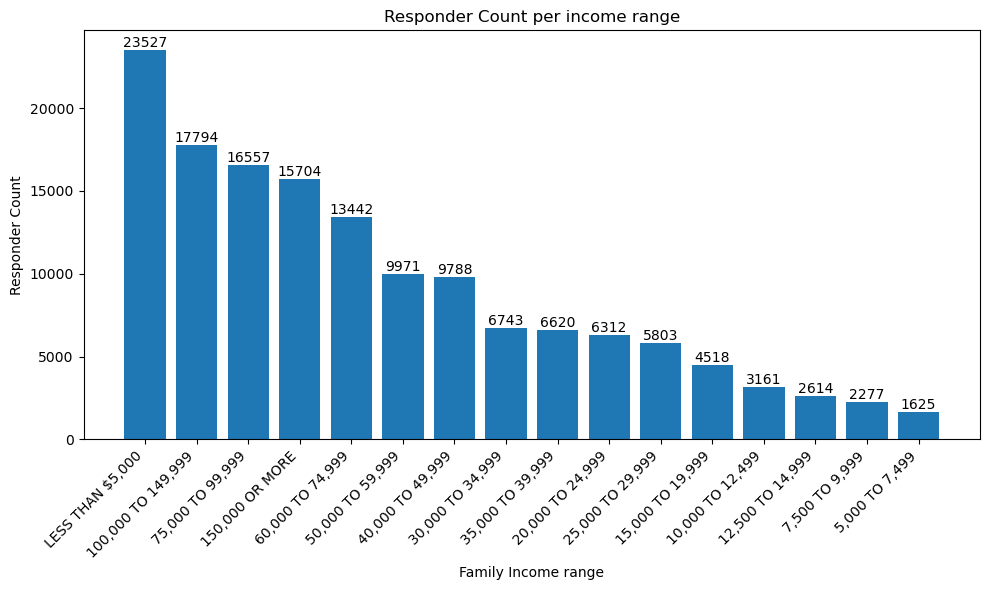

In [65]:
# Select the columns you want for the chart
selected_df = result_1.select("decoded_HEFAMINC", "Responder Count")

# Convert the DataFrame to an RDD of tuples
data = selected_df.rdd.map(tuple)

# Extract x and y values for the chart
x_values = data.map(lambda row: row[0]).collect()
y_values = data.map(lambda row: row[1]).collect()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(x_values, y_values)
plt.xlabel("Family Income range")
plt.ylabel("Responder Count")
plt.title("Responder Count per income range")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add labels (values) on top of each bar
for bar, value in zip(bars, y_values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom', fontsize=10)

# Show the chart
plt.show()

In [54]:
# count of responders per geographical division/location and race

# Group by GEDIV and PTDTRACE and count the responders in each group
loc_and_race = transformed_df.groupBy("decoded_GEDIV", "decoded_PTDTRACE").agg(count("*").alias("Responder Count"))

# Order the result by responder count in descending order
loc_and_race = loc_and_race.orderBy(col("Responder Count").desc())

# Show the top 10 results
loc_and_race.show(10)

+------------------+----------------+---------------+
|     decoded_GEDIV|decoded_PTDTRACE|Responder Count|
+------------------+----------------+---------------+
|    SOUTH ATLANTIC|      White Only|          21308|
|          MOUNTAIN|      White Only|          16893|
|           PACIFIC|      White Only|          15367|
|WEST SOUTH CENTRAL|      White Only|          13602|
|EAST NORTH CENTRAL|      White Only|          13180|
|WEST NORTH CENTRAL|      White Only|          11590|
|   MIDDLE ATLANTIC|      White Only|          10534|
|       NEW ENGLAND|      White Only|          10315|
|EAST SOUTH CENTRAL|      White Only|           8092|
|    SOUTH ATLANTIC|      Black Only|           4899|
+------------------+----------------+---------------+
only showing top 10 rows



Answer for the question is displayed as a bar chart below

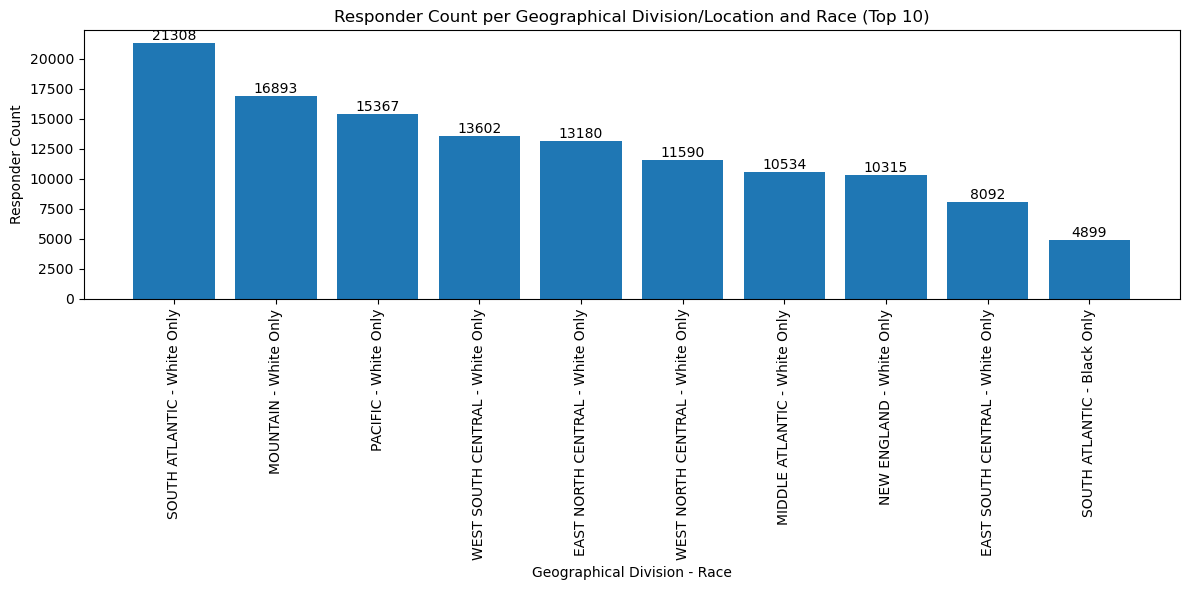

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already executed the code you provided
# and stored the result in the loc_and_race DataFrame

# Convert loc_and_race DataFrame to a Pandas DataFrame
loc_and_race_pd = loc_and_race.toPandas()

# Select the top 10 results
top_10 = loc_and_race_pd.head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(top_10)), top_10["Responder Count"])
plt.xlabel("Geographical Division - Race")
plt.ylabel("Responder Count")
plt.title("Responder Count per Geographical Division/Location and Race (Top 10)")
plt.xticks(range(len(top_10)), top_10["decoded_GEDIV"] + " - " + top_10["decoded_PTDTRACE"], rotation=90)
plt.tight_layout()

# Add labels (values) on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)

# Save the chart as a picture (e.g., PNG)
plt.savefig("loc_and_race.png")

# Show the chart
plt.show()

In [55]:
# Filter the DataFrame based on the conditions
result_3 = transformed_df.filter(
    (F.col("decoded_HETELHHD") == "NO") &
    (F.col("decoded_HETELAVL") == "YES") &
    (F.col("decoded_HEPHONEO") == "YES")
).count()

print("Count of responders who meet the criteria:", result_3)

Count of responders who meet the criteria: 635


In [57]:


# Filter the DataFrame based on the conditions
q4 = transformed_df.filter(
    ((col("decoded_HETELAVL") == "YES") | (col("decoded_HETELHHD") == "YES")) &
    (col("decoded_HEPHONEO") == "NO")
)

# Count the number of responders
count = q4.count()

# Print the count
print("Number of responders who can access a telephone but telephone interview is not accepted:", count)


Number of responders who can access a telephone but telephone interview is not accepted: 25795


In [71]:
# Stop the Spark session
spark.stop()